## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

# Step 1: Make the CSV data useable

- The first step is to take the csv data and make it pragmatic in the sense that our program can iterate through the data, save what's important so that we can make hypothesis' and test them.

# Investigating Netflix Movies and Guest Stars in 'The Office' Data Science Project

* We want to do something, project purpose

## Imports

In [79]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
import matplotlib.pyplot as plt

## Creating the DataFrame

In [80]:
df = pd.read_csv("datasets/office_episodes.csv")
df.iloc[77]

episode_number                                                   77
season                                                            5
episode_title                                         Stress Relief
description       Dwight's too-realistic fire alarm gives Stanle...
ratings                                                         9.7
votes                                                          8170
viewership_mil                                                22.91
duration                                                         60
release_date                                             2009-02-01
guest_stars               Cloris Leachman, Jack Black, Jessica Alba
director                                              Jeffrey Blitz
writers                                            Paul Lieberstein
has_guests                                                     True
scaled_ratings                                              0.96875
Name: 77, dtype: object

## Basic Visualization

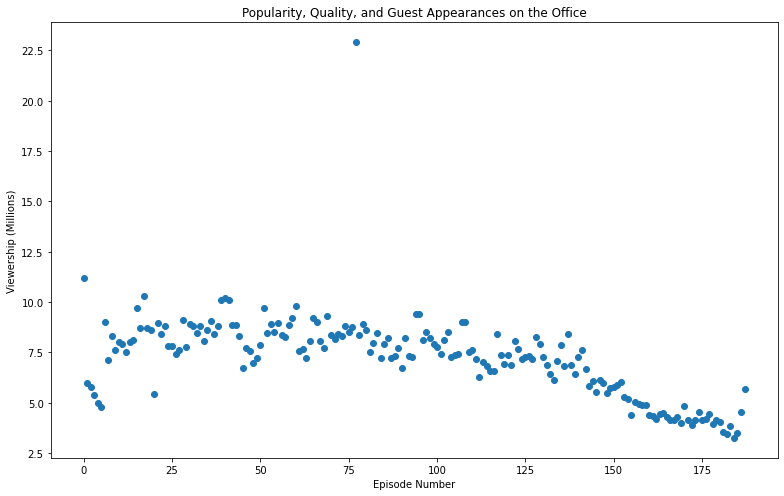

In [81]:
x = df["episode_number"]
y = df["viewership_mil"]

plt.scatter(x, y)
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.show()

## Adding Color

- We have to use `pd.iterrows()` here because we want to do something different depending on the data in each row. If we wanted to do the same things in each row, a better approach would be to use the `apply()` method.

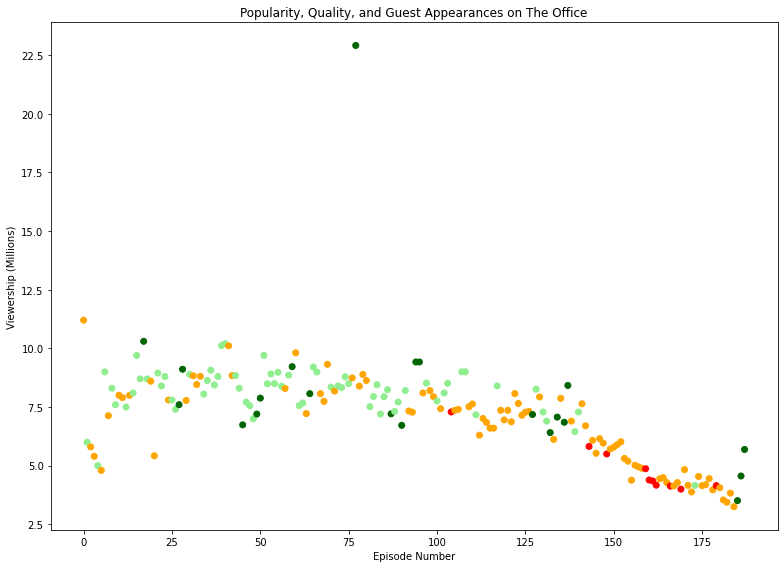

In [82]:
colors = []
for lab, row in df.iterrows():
    if row["scaled_ratings"] < 0.25:
        colors.append("red")
    elif 0.25 <= row["scaled_ratings"] < 0.5:
        colors.append("orange")
    elif 0.5 <= row["scaled_ratings"] < 0.75:
        colors.append("lightgreen")
    else:
        colors.append("darkgreen")

# Initialize the figure first
fig = plt.figure(figsize=(11, 8))

# Add labels, title, and scatter plot
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.title("Popularity, Quality, and Guest Appearances on The Office")
plt.scatter(x, y, c=colors)

# Display the plot
plt.show()


## Making the Sizing System

In [83]:
df["marker_size"] = df["has_guests"].apply(lambda x: 250 if x else 25)

## Putting it all together

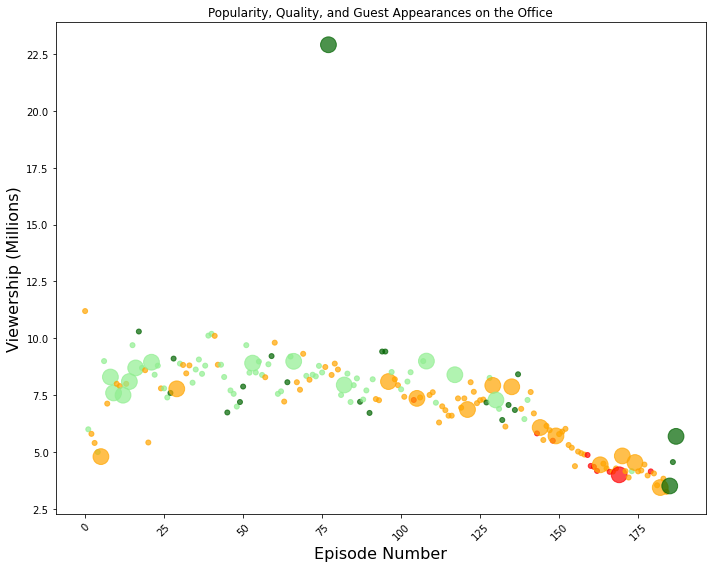

In [84]:
x = df["episode_number"]
y = df["viewership_mil"]

fig = plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=colors, s=df["marker_size"], alpha=0.7)
plt.xlabel("Episode Number", fontsize=16)
plt.ylabel("Viewership (Millions)", fontsize=16)
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xticks(rotation=45)
plt.show()

In [85]:
top_star = df[df["viewership_mil"] > 20]
print(top_star["guest_stars"].all())

Cloris Leachman, Jack Black, Jessica Alba
